In [27]:
import os 
os.getcwd()
os.chdir(r'C:\Users\MAIN\Desktop\ML\Data Science Educaton\Projects\Google ads Project\Ad Campaign')

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

#import dataset
df = pd.read_csv("Addataset.csv", na_values=" ")
#df = pd.read_csv('Addataset.csv', index_col='click_date', parse_dates=True)
df.head(n=5)
df.columns
df.shape

print('Unique counts:',df.nunique())

df.describe()
df.size
print('missing values:',df.isnull().sum())


print('Unique counts grouping1:',df.grouping1.nunique())

print('Unique counts grouping2:',df.grouping2.nunique())


Unique counts: click_date        30
campaign        1610
adgroup        24145
keyword        44237
grouping1        409
grouping2        233
cost            3393
conversions        7
dtype: int64
missing values: click_date         0
campaign           0
adgroup            0
keyword            0
grouping1      17385
grouping2      17843
cost               0
conversions        0
dtype: int64
Unique counts grouping1: 409
Unique counts grouping2: 233


# Business Analytics

    campaign      cost  conversions         CPA
0  372639877     71.08            2   35.540000
1  372639878     63.46            0    0.000000
2  372639883  37601.39          177  212.437232
3  372639884     12.48            0    0.000000
4  372639885    345.39            1  345.390000
5  372639886    203.82            2  101.910000
6  372639888      5.12            0    0.000000
7  372639889    290.30            1  290.300000
8  372639892   2189.49           16  136.843125
9  372639893    420.21            3  140.070000
       campaign     cost  conversions       CPA
804   521646114     0.38            0     0.000
908   521646288   155.92            0     0.000
907   521646287     1.71            0     0.000
906   521646286     8.31            0     0.000
905   521646284     1.30            0     0.000
...         ...      ...          ...       ...
259   452592094   556.44            1   556.440
1334  565313651   598.76            1   598.760
523   521645429  1334.85            2   

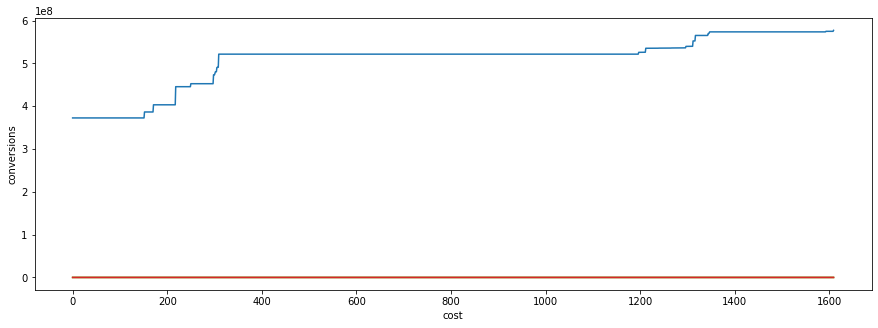

'based on the graph, we want to optimize camoaign metrics that have a lower CPC and high conversions'

In [67]:
#How does campaign cost relate to conversion?
df.conversions = df.conversions.astype(int)
m = df.groupby(['campaign']).agg({'cost':'sum','conversions':'sum'}).reset_index()
m.head(n=10)

'''compute cost per acquisition(CPA). Computing the CPA individually will discount the cost that had 0 conversions
but taking the sum for the campaigns will take into consideration the individual costs that had no conversions''' 

m['CPA'] = m['cost']/m['conversions']
m.head(n=10)
from numpy import inf
m[m == inf] = 0
print(m.head(n=10))
print(m.sort_values(by = ['CPA'], ascending=True))
m.head()

'''the goal of the analysis is to find out the campaign with the lowest CPA and optimise or replicate it. every analysis must
have a goal'''

plt.figure(figsize=(15,5))
plt.xlabel("cost")
plt.ylabel("conversions")
plt.plot(m)
plt.show()

'''based on the graph, we want to optimize campaign metrics that have a lower CPC and high conversions'''

click_date
2019-09-01     97
2019-09-02    103
2019-09-03     87
2019-09-04     98
2019-09-05     80
2019-09-06     63
2019-09-07     66
2019-09-08     93
2019-09-09     98
2019-09-10     84
2019-09-11     85
2019-09-12     57
2019-09-13     61
2019-09-14     58
2019-09-15     85
2019-09-16     69
2019-09-17    103
2019-09-18     47
2019-09-19     59
2019-09-20     53
2019-09-21     63
2019-09-22     82
2019-09-23     90
2019-09-24     79
2019-09-25     71
2019-09-26     59
2019-09-27     48
2019-09-28     56
2019-09-29     67
2019-09-30     82
Freq: D, Name: conversions, dtype: int32


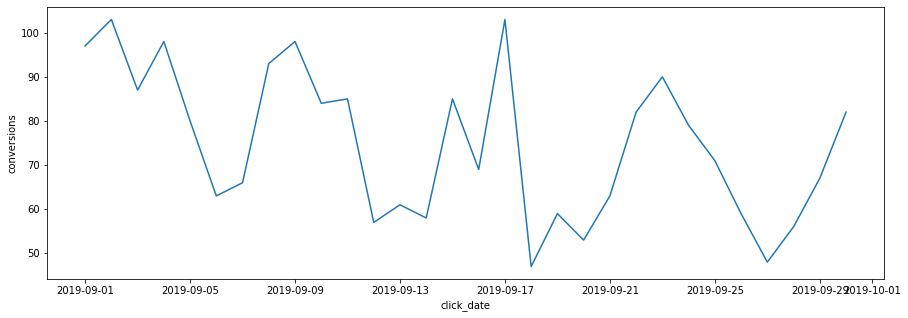

In [29]:
#Time series analysis of ads data. This was performed to show trends in the ads parameters with time.
#convert transaction date column to datetime
df['click_date'] = pd.to_datetime(df['click_date'])

#df1 = pd.read_csv('Addataset.csv', index_col='click_date', parse_dates=True)
#The dataset is for one month only and the series is done by day 
#df1.head()
df['click_date'] = pd.to_datetime(df['click_date'])
df1 = df.set_index('click_date').resample('D')["conversions"].sum()
print(df1)

plt.figure(figsize=(15,5))
plt.xlabel("click_date")
plt.ylabel("conversions")
plt.plot(df1)
plt.show()

C:\Users\MAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


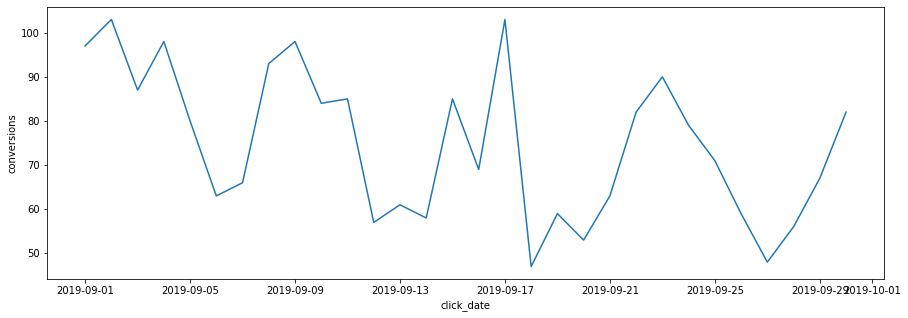

In [55]:
#Time series analysis for the best performing campaign
df1 = df.loc[df['campaign'] == 372639883]  
# display 
df1

df1['click_date'] = pd.to_datetime(df1['click_date'])
df2 = df.set_index('click_date').resample('D')["conversions"].sum()
df2

plt.figure(figsize=(15,5))
plt.xlabel("click_date")
plt.ylabel("conversions")
plt.plot(df2)
plt.show()

In [30]:
df['click_date'] = pd.to_datetime(df['click_date'])
df2 = df.set_index('click_date').resample('D')["adgroup"].count()
df2.head(n=5)
df.groupby(['adgroup', pd.Grouper(key='click_date', freq='D')])['conversions'].sum()

adgroup    click_date
372649215  2019-09-06    0
           2019-09-09    0
           2019-09-16    0
           2019-09-20    0
           2019-09-22    1
                        ..
577240238  2019-09-29    0
           2019-09-30    0
577240248  2019-09-28    1
577240251  2019-09-30    0
577240264  2019-09-28    0
Name: conversions, Length: 93405, dtype: int32

In [31]:
#Find the day with the highest moving average of conversions
#select desired columns from dataset
#df['click_date'] = pd.to_datetime(df['click_date'])
df3 = df[['campaign','adgroup','keyword','click_date','conversions']]
df3.head(n=5)

,campaign,adgroup,keyword,click_date,conversions
0,372639877,372649819,378561210,2019-09-01,0
1,372639877,372650342,378685168,2019-09-01,0
2,372639878,372654830,378518461,2019-09-01,0
3,372639878,372655391,378529646,2019-09-01,0
4,372639878,372655391,378533370,2019-09-01,0


In [32]:
#calculate rolling mean on the conversions and store values in a new column
df3['MA_10'] = df3['conversions'].rolling(window=10).mean()
#sort values of rolling mean
df3.sort_values(by=['MA_10'], inplace=True, ascending=False)
df3.head(n=15)
#date with that exhibited the highest average converions for campaigns and keywords 
#is 2019-09-11. (We calculate the moving average to find patterns in CPA and Campaign parameters)


C:\Users\MAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\MAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,campaign,adgroup,keyword,click_date,conversions,MA_10
46812,525860761,525872552,525900849,2019-09-11,0,0.8
46811,525860761,525872552,525900848,2019-09-11,2,0.8
119367,570869598,573506338,573539580,2019-09-30,1,0.8
46813,525860761,525872552,525900850,2019-09-11,0,0.8
119364,570869598,573506331,573540960,2019-09-30,0,0.7
18101,535715449,535716471,535778626,2019-09-04,0,0.7
18100,535715449,535716471,535773407,2019-09-04,0,0.7
18099,535715449,535716471,535773406,2019-09-04,1,0.7
119366,570869598,573506332,573541153,2019-09-30,0,0.7
119365,570869598,573506331,573541022,2019-09-30,0,0.7


In [38]:
#To plot the trends we group by click_date and take a sum of the Moving Averages
df3['click_date'] = pd.to_datetime(df3['click_date'])
dfm = df3.groupby(['click_date'])['MA_10'].sum().reset_index()
print(dfm)


   click_date  MA_10
0  2019-09-01   97.0
1  2019-09-02  103.0
2  2019-09-03   87.0
3  2019-09-04   98.0
4  2019-09-05   80.0
5  2019-09-06   63.0
6  2019-09-07   66.0
7  2019-09-08   93.0
8  2019-09-09   98.0
9  2019-09-10   84.0
10 2019-09-11   85.0
11 2019-09-12   57.0
12 2019-09-13   61.0
13 2019-09-14   58.0
14 2019-09-15   85.0
15 2019-09-16   69.0
16 2019-09-17  103.0
17 2019-09-18   46.3
18 2019-09-19   59.7
19 2019-09-20   53.0
20 2019-09-21   63.0
21 2019-09-22   81.3
22 2019-09-23   89.2
23 2019-09-24   80.5
24 2019-09-25   70.3
25 2019-09-26   59.7
26 2019-09-27   48.0
27 2019-09-28   55.3
28 2019-09-29   67.7
29 2019-09-30   81.3


C:\Users\MAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
dfm['click_date'] = pd.to_datetime(dfm['click_date'])
dfm.set_index('click_date', inplace=True)

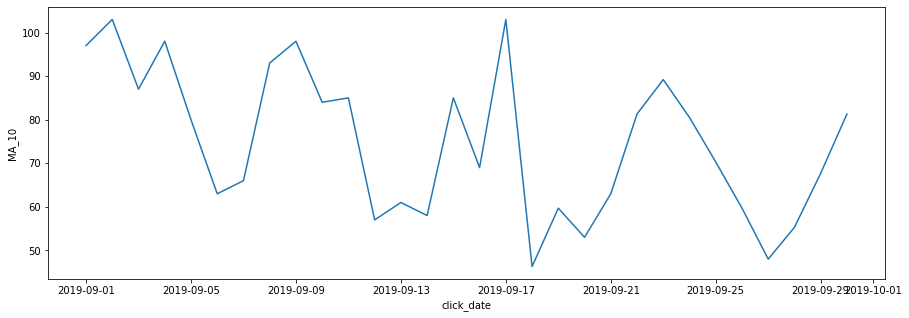

In [61]:
plt.figure(figsize=(15,5))
plt.xlabel("click_date")
plt.ylabel("MA_10")
plt.plot(dfm)
plt.show()

### BUSINESS ANALYSIS SUMMARY

There were four main peaks in conversions for the ads on certain days of the week.The four highest peaks observed
correspond with the beginning of the week on Monday. The trend continues to decrease until the last day
of the woring week which is Friday. Its likely that people are more likely to make purchase on week days,
especially during the beginning of the week, by the end of the week the customers have already made their
purchase and therefore resulting in low conversion on the weekends. This may be a little bit against 
conventional wisdom with the believe that users make buy decisions when they are more relaxed on weekends.
However, it is more functional to buy at the beginning of the week and get it delivered before the
weekend while the customer may be away.

However, when taken individually for the 
As a recommendation, ads should be targeted for the beginning of the week.

Date that exhibited the highest average converions for campaigns and keywords is 2019-09-11. Applying the rolling mean we start to see patterns emerge and it gives us an idea of emerging trends(Calculate moving average to find patterns in CPA and Campaign parameters)

# Grouping Analytics

In [41]:
#group campaign and click_date with cost and conversion
df.groupby(['click_date', 'campaign']).agg({'cost':'sum','conversions':'sum'}).sort_values(by= ['conversions'], ascending=False)


cost  conversions
click_date campaign                       
2019-09-23 372639883  1221.75           13
2019-09-30 570869598   247.67           12
2019-09-09 525860761   419.48           10
2019-09-08 525860761   425.60           10
           372639883  1409.21           10
...                       ...          ...
2019-09-11 521645421     4.46            0
           521645423     0.81            0
           521645424     2.95            0
           521645425    21.33            0
2019-09-16 372640000     1.86            0

[18736 rows x 2 columns]

In [42]:
#group keyword and click_date with cost and conversion
df.groupby(['click_date', 'keyword']).agg({'cost':'sum','conversions':'sum'}).sort_values(by= ['conversions'], ascending=False)


,,cost,conversions
click_date,keyword,,
2019-09-30,573540429,167.47,6
2019-09-04,535773268,6.11,5
2019-09-07,520227615,179.37,4
2019-09-28,525900517,55.68,4
2019-09-15,520227615,199.62,4
2019-09-19,520260464,3.11,4
2019-09-29,520324158,29.64,3
2019-09-17,378739185,55.10,3
2019-09-30,573541107,59.05,3


In [43]:
#group adgroup and click_date with cost and conversion
df.groupby(['click_date', 'adgroup']).agg({'cost':'sum','conversions':'sum'}).sort_values(by= ['conversions'], ascending=False)


,,cost,conversions
click_date,adgroup,,
2019-09-30,573506331,179.47,7
2019-09-04,535716375,9.23,5
2019-09-05,525872854,28.01,5
2019-09-28,573506331,56.04,4
2019-09-15,521658850,199.62,4
2019-09-30,573506345,64.49,4
2019-09-07,521658850,179.37,4
2019-09-19,521698116,3.94,4
2019-09-28,525872398,72.74,4


In [44]:
#group grouping1 and click_date with cost and conversion
df.groupby(['click_date', 'grouping1']).agg({'cost':'sum','conversions':'sum'}).sort_values(by= ['conversions'], ascending=False)

,,cost,conversions
click_date,grouping1,,
2019-09-23,2573715.0,1263.62,13
2019-09-08,2573715.0,1424.12,10
2019-09-22,2573715.0,1036.17,10
2019-09-03,2573715.0,1634.33,10
2019-09-05,2573715.0,1321.17,9
2019-09-04,2573843.0,136.86,9
2019-09-02,2574467.0,674.89,9
2019-09-17,2573715.0,1096.23,9
2019-09-11,2574467.0,666.22,8


In [46]:
a = df.groupby(['campaign']).agg({'cost':'sum','conversions':'sum'}).sort_values(by= ['conversions'], ascending=False)
b= a[:20] #the 20 best performing campaigns
print(b)
z= a.tail(20)  #the 20 lowest performing campaigns
z

               cost  conversions
campaign                        
372639883  37601.39          177
525860761  14765.76          177
372639997  12676.27          120
525860762   4948.31           55
521646072   2790.06           54
403307496  11612.45           53
521645975   9253.54           43
452592022   6811.41           42
525860765   5021.74           41
403307498   6282.67           37
521646572   1813.63           36
372639957   8044.32           36
403307480   6934.11           35
372639944   9182.86           33
445623994   3721.07           31
403307489   4016.21           29
535715449   1831.42           28
535715455   1061.66           26
521645426   3743.56           26
539897549   3119.38           26


,cost,conversions
campaign,,
521645779,12.03,0
521645780,0.52,0
521645794,8.64,0
372640019,25.98,0
521645810,3.06,0
521645808,3.19,0
521645802,0.92,0
521645799,5.88,0
521645796,1.56,0


In [47]:
add_values = ['cost','conversions']
cost_conv_by_day = df.pivot_table(index='click_date', values=add_values, aggfunc='sum')
cost_conv_by_day
cost_conv_by_day.sort_values(by = 'conversions', ascending=False, na_position='first')

,conversions,cost
click_date,,
2019-09-17,103,10523.31
2019-09-02,103,13694.70
2019-09-04,98,11782.36
2019-09-09,98,12035.72
2019-09-01,97,12434.58
2019-09-08,93,12783.86
2019-09-23,90,9656.31
2019-09-03,87,12593.61
2019-09-15,85,9979.12


In [48]:
df.groupby(['click_date']).agg({'cost':'sum'}).reset_index()

,click_date,cost
0,2019-09-01,12434.58
1,2019-09-02,13694.70
2,2019-09-03,12593.61
3,2019-09-04,11782.36
4,2019-09-05,10831.25
5,2019-09-06,9788.41
6,2019-09-07,9945.11
7,2019-09-08,12783.86
8,2019-09-09,12035.72
9,2019-09-10,11521.80


In [50]:
df.groupby('click_date').first()

,campaign,adgroup,keyword,grouping1,grouping2,cost,conversions
click_date,,,,,,,
2019-09-01,372639877,372649819,378561210,2574075.0,2583803.0,1.31,0
2019-09-02,372639877,372652535,378554893,2574075.0,2583803.0,0.54,0
2019-09-03,372639878,372658834,378537522,2574099.0,2583763.0,0.60,0
2019-09-04,372639877,372649818,378694771,2574075.0,2584239.0,1.14,0
2019-09-05,372639877,372652535,378554893,2574075.0,2583803.0,1.31,0
2019-09-06,372639877,372652535,378554893,2574075.0,2583803.0,0.63,0
2019-09-07,372639877,372652535,378554893,2574075.0,2583803.0,2.16,0
2019-09-08,372639877,372654801,378503527,2574075.0,2583683.0,1.28,0
2019-09-09,372639877,372652544,378715294,2574075.0,2583855.0,0.61,0


In [51]:
df.groupby('click_date')['conversions'].sum()

click_date
2019-09-01     97
2019-09-02    103
2019-09-03     87
2019-09-04     98
2019-09-05     80
2019-09-06     63
2019-09-07     66
2019-09-08     93
2019-09-09     98
2019-09-10     84
2019-09-11     85
2019-09-12     57
2019-09-13     61
2019-09-14     58
2019-09-15     85
2019-09-16     69
2019-09-17    103
2019-09-18     47
2019-09-19     59
2019-09-20     53
2019-09-21     63
2019-09-22     82
2019-09-23     90
2019-09-24     79
2019-09-25     71
2019-09-26     59
2019-09-27     48
2019-09-28     56
2019-09-29     67
2019-09-30     82
Name: conversions, dtype: int32

In [52]:
df.groupby('click_date')['cost'].sum()

click_date
2019-09-01    12434.58
2019-09-02    13694.70
2019-09-03    12593.61
2019-09-04    11782.36
2019-09-05    10831.25
2019-09-06     9788.41
2019-09-07     9945.11
2019-09-08    12783.86
2019-09-09    12035.72
2019-09-10    11521.80
2019-09-11     9930.14
2019-09-12     9124.39
2019-09-13     7543.90
2019-09-14     7414.70
2019-09-15     9979.12
2019-09-16     9321.71
2019-09-17    10523.31
2019-09-18     8877.67
2019-09-19     7360.34
2019-09-20     6820.70
2019-09-21     6648.75
2019-09-22     8976.09
2019-09-23     9656.31
2019-09-24     9192.42
2019-09-25     8934.63
2019-09-26     9494.59
2019-09-27     8359.46
2019-09-28     8094.53
2019-09-29    10560.28
2019-09-30    10209.81
Name: cost, dtype: float64

In [53]:
df.groupby('click_date')['keyword'].count()

click_date
2019-09-01    4827
2019-09-02    5057
2019-09-03    4430
2019-09-04    4241
2019-09-05    3884
2019-09-06    3779
2019-09-07    4046
2019-09-08    4858
2019-09-09    4428
2019-09-10    4303
2019-09-11    4102
2019-09-12    3843
2019-09-13    3425
2019-09-14    3618
2019-09-15    4530
2019-09-16    4180
2019-09-17    4388
2019-09-18    3886
2019-09-19    3351
2019-09-20    3102
2019-09-21    3119
2019-09-22    3942
2019-09-23    3926
2019-09-24    3879
2019-09-25    3559
2019-09-26    3525
2019-09-27    3390
2019-09-28    3474
2019-09-29    4500
2019-09-30    4381
Name: keyword, dtype: int64

In [54]:
df.groupby(['click_date','campaign'])['conversions'].sum()

click_date  campaign 
2019-09-01  372639877    0
            372639878    0
            372639883    6
            372639884    0
            372639885    0
                        ..
2019-09-30  574976767    0
            574976768    0
            574976770    0
            574976781    1
            577234907    1
Name: conversions, Length: 18736, dtype: int32